                                                  1DECISION TREE                                                   

Objective:               
                            
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.                        
                           
Tasks:                  
                         
1. Data Preparation:      
                                                                                      
* Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,ConfusionMatrixDisplay
from sklearn import tree


In [2]:
df = pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    float64
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    float64
 4   chol      908 non-null    float64
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    float64
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    float64
dtypes: float64(6), object(7)
memory usage: 101.6+ KB


2. Exploratory Data Analysis (EDA):                                             

* Perform exploratory data analysis to understand the structure of the dataset.           
* Check for missing values, outliers, and inconsistencies in the data.                                        
* Visualize the distribution of features, including histograms, box plots, and correlation matrices.              


In [4]:
print(df.isnull().sum())

age          91
sex          91
cp           91
trestbps     91
chol         91
fbs          91
restecg      91
thalch       91
exang        91
oldpeak     153
slope        91
thal         91
num          91
dtype: int64


In [5]:
print(df.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


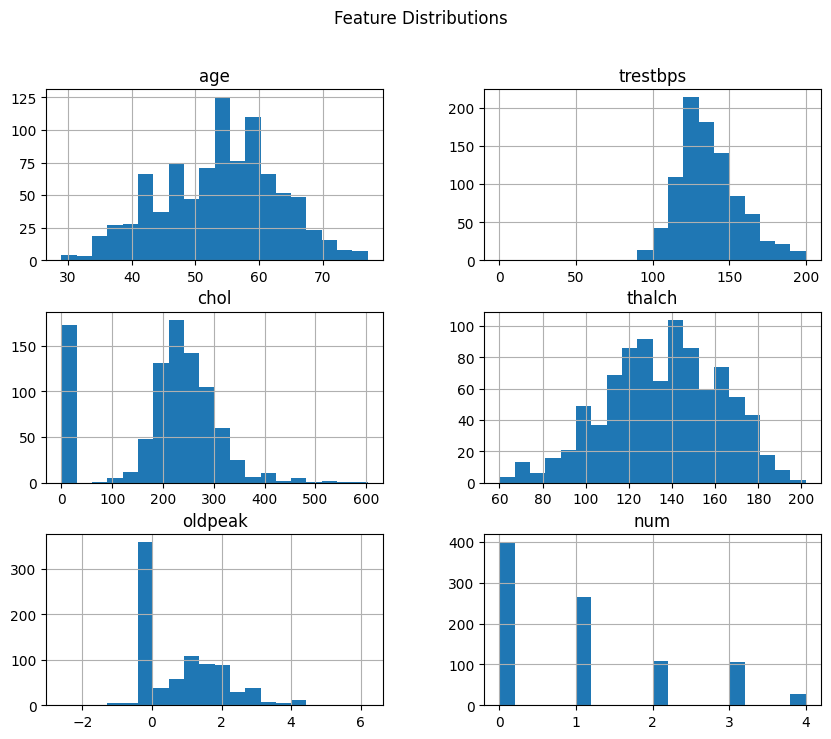

In [6]:
df.hist(figsize=(10,8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

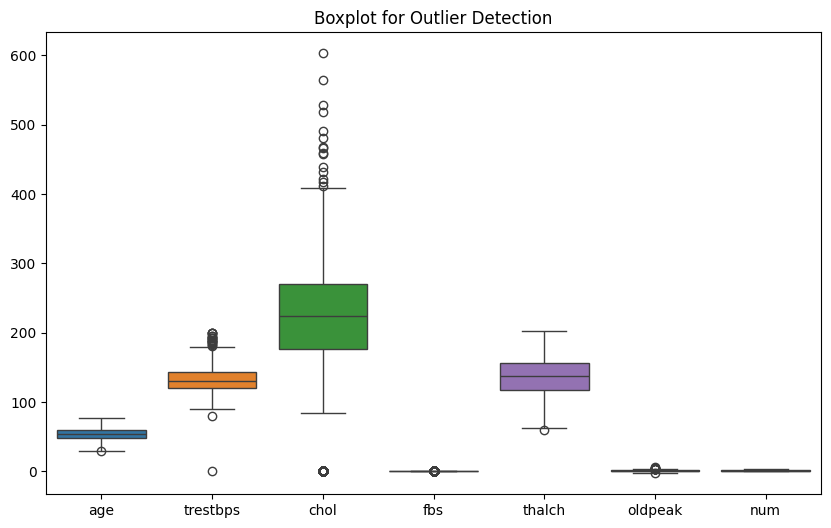

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.show()

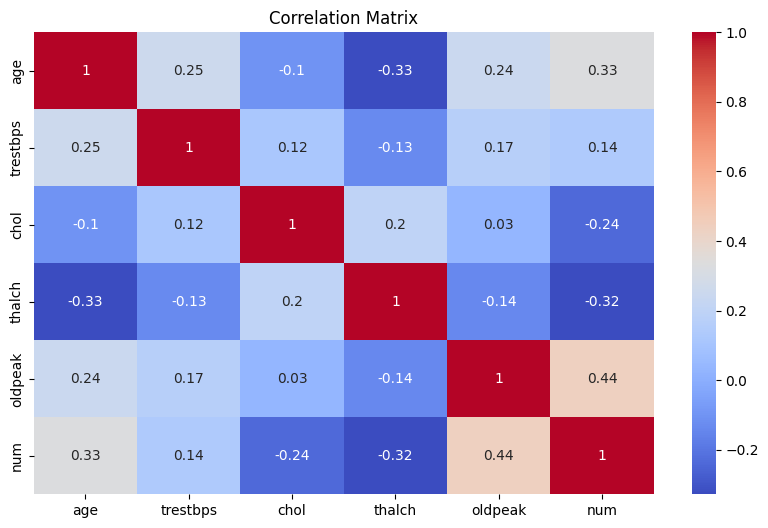

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

3. Feature Engineering:                 

* If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
df.dropna(inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


In [12]:

scaler = StandardScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [14]:
X = df.drop('num', axis=1)  
y = df['num']

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.052849,0.53635,2.358435,0.652591,0.271960,2.086727,-1.549438,0.501387,-0.805682,1.288612,-1.677998,-1.535299,-0.868621
1,-1.366364,0.53635,0.249306,0.132633,0.003114,-0.479219,0.064878,-0.201922,-0.805682,-0.815249,-0.224993,-1.535299,-0.868621
2,0.393064,0.53635,-0.805258,0.392612,-0.095463,-0.479219,0.064878,0.423242,-0.805682,-0.449360,-0.224993,-1.535299,-0.868621
3,-0.156758,0.53635,2.358435,-0.751298,-0.149232,-0.479219,-1.549438,2.064297,-0.805682,-0.815249,-0.224993,-1.535299,-0.868621
4,0.393064,0.53635,-0.805258,-1.167265,-0.014809,-0.479219,0.064878,-0.436358,1.241185,0.556834,-0.224993,-1.535299,-0.868621


In [16]:
print(df.shape)

print(df.dtypes)

(846, 13)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalch      float64
exang       float64
oldpeak     float64
slope       float64
thal        float64
num         float64
dtype: object


4. Decision Tree Classification:                        
                    
* Split the dataset into training and testing sets (e.g., using an 80-20 split).                    
* Implement a Decision Tree Classification model using a library like scikit-learn.                  
* Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

In [23]:
print(y_train.head())
print(y_train.dtype)
print(y_train.unique()[:10])


701    0.904246
669    0.904246
593    0.017812
836    1.790680
562    0.017812
Name: num, dtype: float64
float64
[ 0.90424611  0.0178125   1.79067972 -0.86862112  2.67711334]


In [25]:
dt_model = DecisionTreeRegressor(criterion='squared_error', max_depth=None, random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [26]:
y_pred = dt_model.predict(X_test)

In [31]:
print("\nDecision Tree Regression Model Evaluation:\n")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Decision Tree Regression Model Evaluation:

Mean Absolute Error (MAE): 0.7300041529560983
Mean Squared Error (MSE): 1.2664675729621506
Root Mean Squared Error (RMSE): 1.125374414567059
R² Score: -0.0031010422947712613


In [32]:
try:
    y_pred_prob = dt_model.predict_proba(X_test)[:, 1]
    print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
except:
    print("\nROC-AUC Score: Not applicable (requires probabilistic output)")


ROC-AUC Score: Not applicable (requires probabilistic output)


5. Hyperparameter Tuning:           

* Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


In [37]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [38]:
dt = DecisionTreeRegressor(random_state=42)

In [39]:
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='r2',     # ✅ use regression metric
    n_jobs=-1
)

In [40]:
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [41]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R² Score: 0.2176742928851597


6. Model Evaluation and Analysis:             

* Analyse the performance of the Decision Tree model using the evaluation metrics obtained.         
* Visualize the decision tree structure to understand the rules learned by the model and identify important features


In [43]:
print("\nDecision Tree Regression Model Evaluation:\n")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Decision Tree Regression Model Evaluation:

Mean Absolute Error (MAE): 0.7300041529560983
Mean Squared Error (MSE): 1.2664675729621506
Root Mean Squared Error (RMSE): 1.125374414567059
R² Score: -0.0031010422947712613


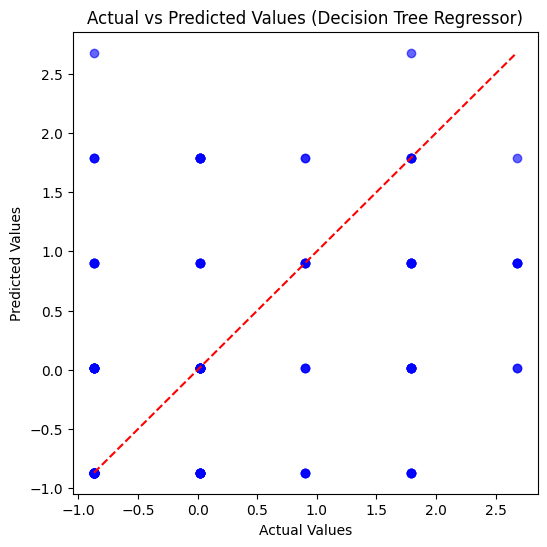

In [45]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Decision Tree Regressor)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.show()

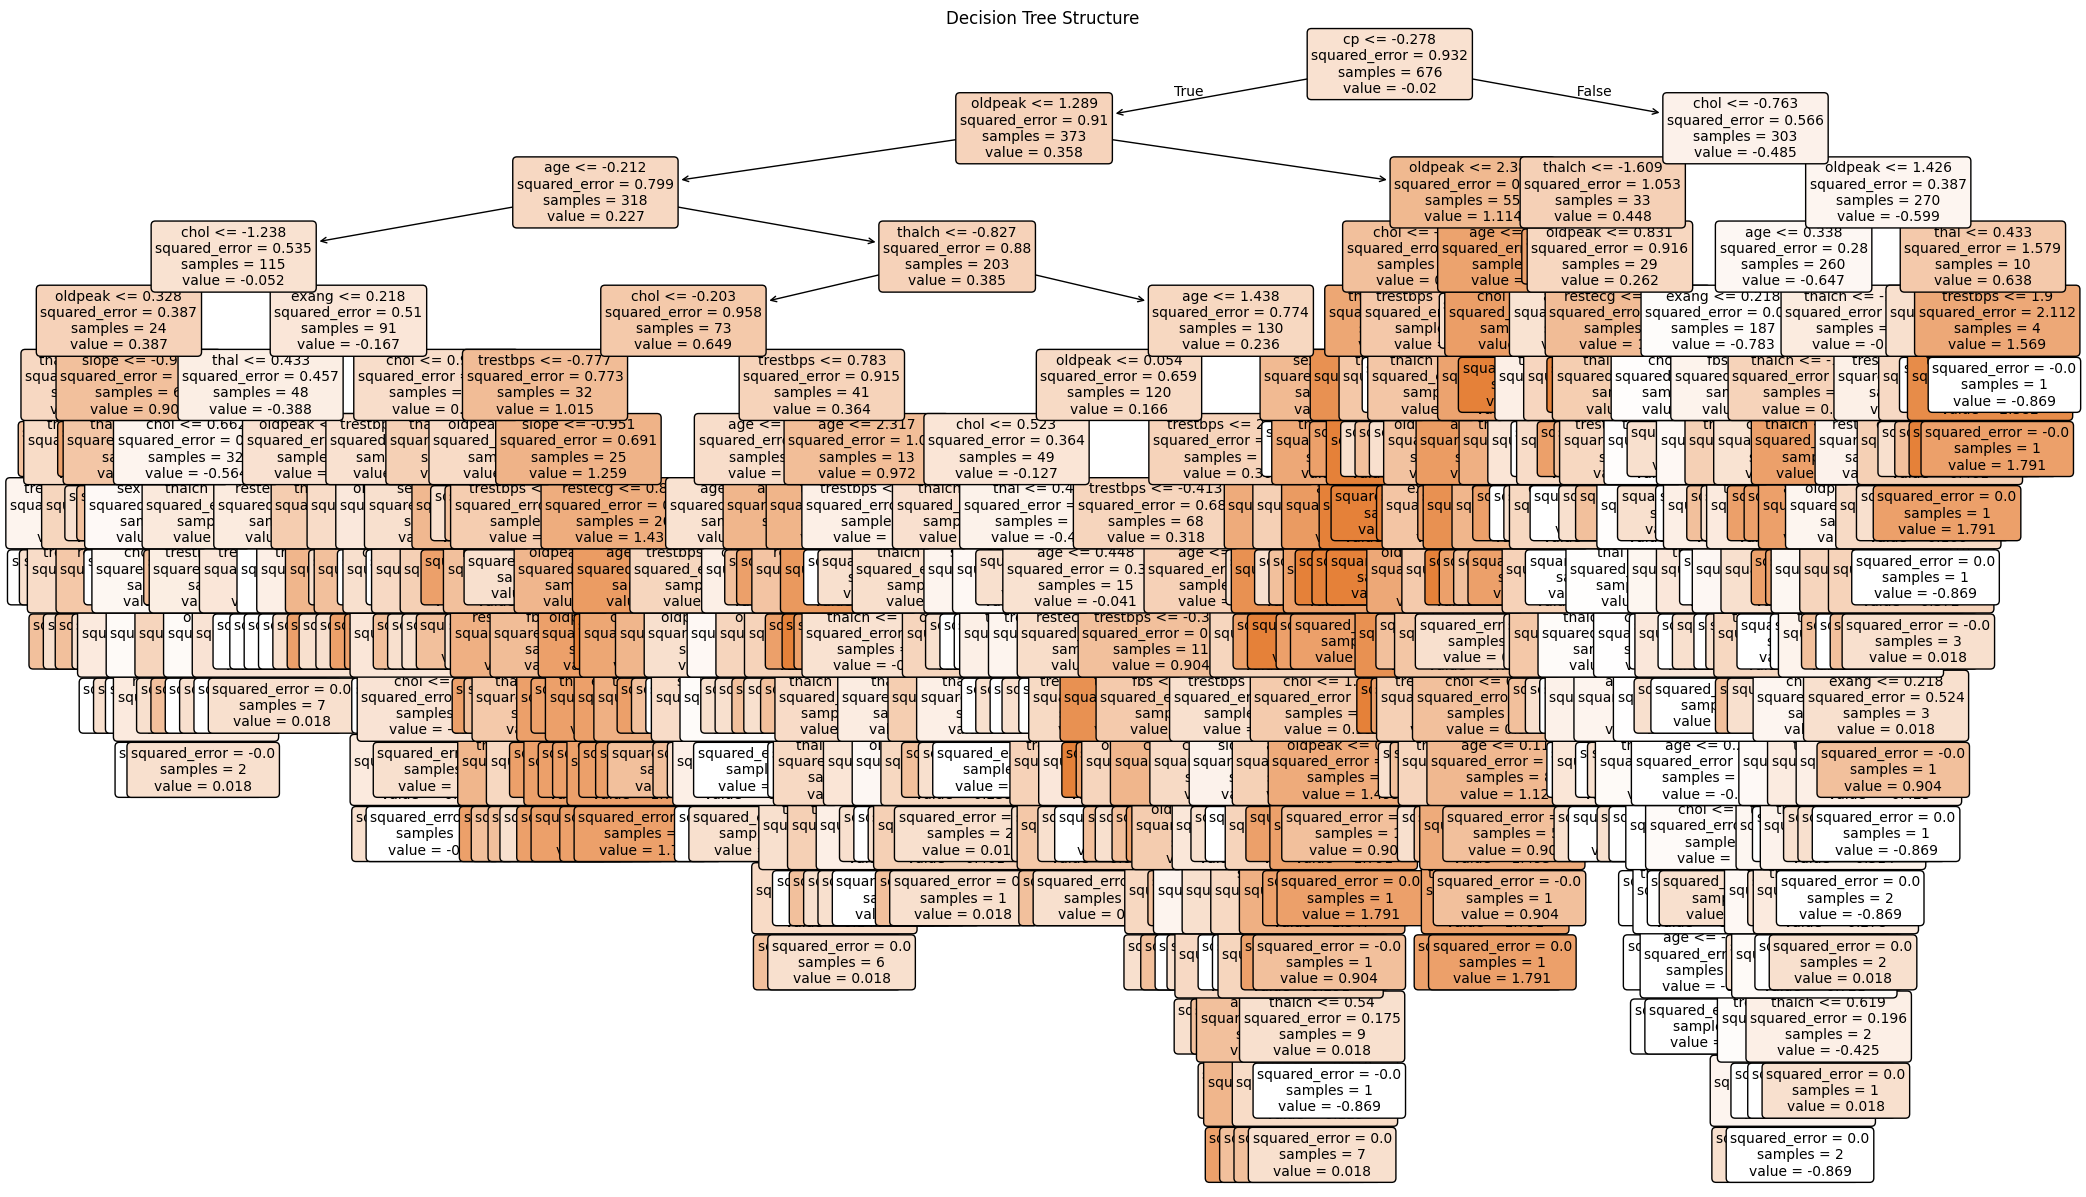

In [46]:
plt.figure(figsize=(25, 15))
plot_tree(
    dt_model, 
    feature_names=X.columns, 
    class_names=['No Heart Disease', 'Heart Disease'],
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()

In [47]:
importances = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


print("\n Feature Importance:\n", feature_importance_df.head())


 Feature Importance:
    Feature  Importance
2       cp    0.196366
9  oldpeak    0.173824
4     chol    0.128750
0      age    0.120754
7   thalch    0.118870


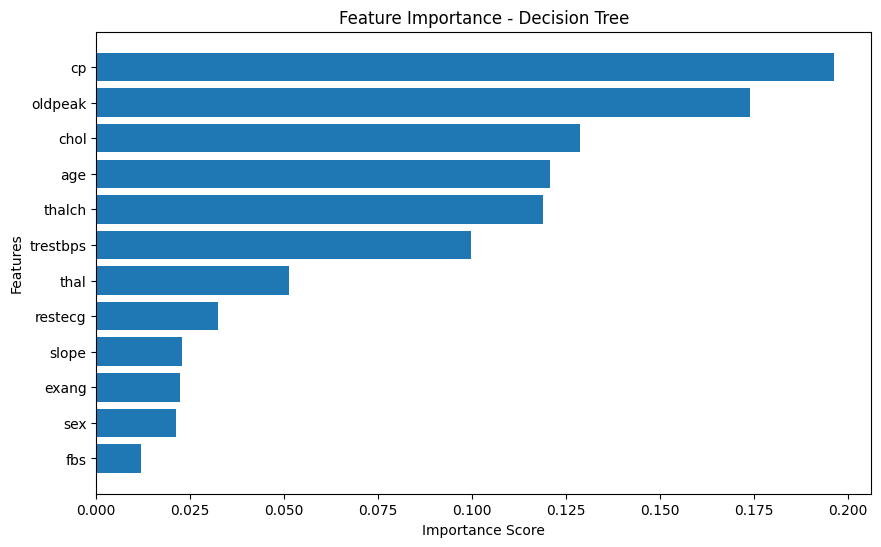

In [48]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

Interview Questions:                     

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?                      

Some common hyperparameters in a Decision Tree are things like:
                                   
* max_depth → This controls how deep the tree can go. If it’s too deep, the model can overfit; if it’s too shallow, it might underfit.                      
                
* min_samples_split → It’s the minimum number of samples needed to split a node. Increasing it makes the model more general (less overfitting).           
                       
* min_samples_leaf → Minimum samples required in a leaf node. Higher values make the tree smoother.            
                                 
* criterion → This decides how the quality of a split is measured, usually ‘gini’ or ‘entropy’.
                                          
* max_features → Limits how many features the model looks at while splitting. It helps reduce overfitting and speeds up training.                            
                                  
So basically, tuning these hyperparameters helps balance between overfitting and generalization of the model.


2. What is the difference between the Label encoding and One-hot encoding?          
                    
* Label Encoding converts categories into numeric values like 0, 1, 2, etc. For example, “Red”, “Green”, “Blue” → 0, 1, 2.
It’s simple and compact, but it can create a false order between categories (like implying Blue > Green).
                                                 
* One-Hot Encoding creates a separate column for each category with 0s and 1s.
For example, “Red”, “Green”, “Blue” → [1,0,0], [0,1,0], [0,0,1].
It avoids that false order but increases the number of columns (especially if there are many categories).